In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [0]:
from fastai.vision import *
from fastai import *
import time
import cv2 as cv
import matplotlib.pyplot as plt

In [0]:
#we change directory:
import os
os.chdir('gdrive/My Drive/fellowshipAI/cars_train')
!pwd

/content/gdrive/My Drive/fellowshipAI/cars_train


In [0]:
IM=open_image("00016.jpg")


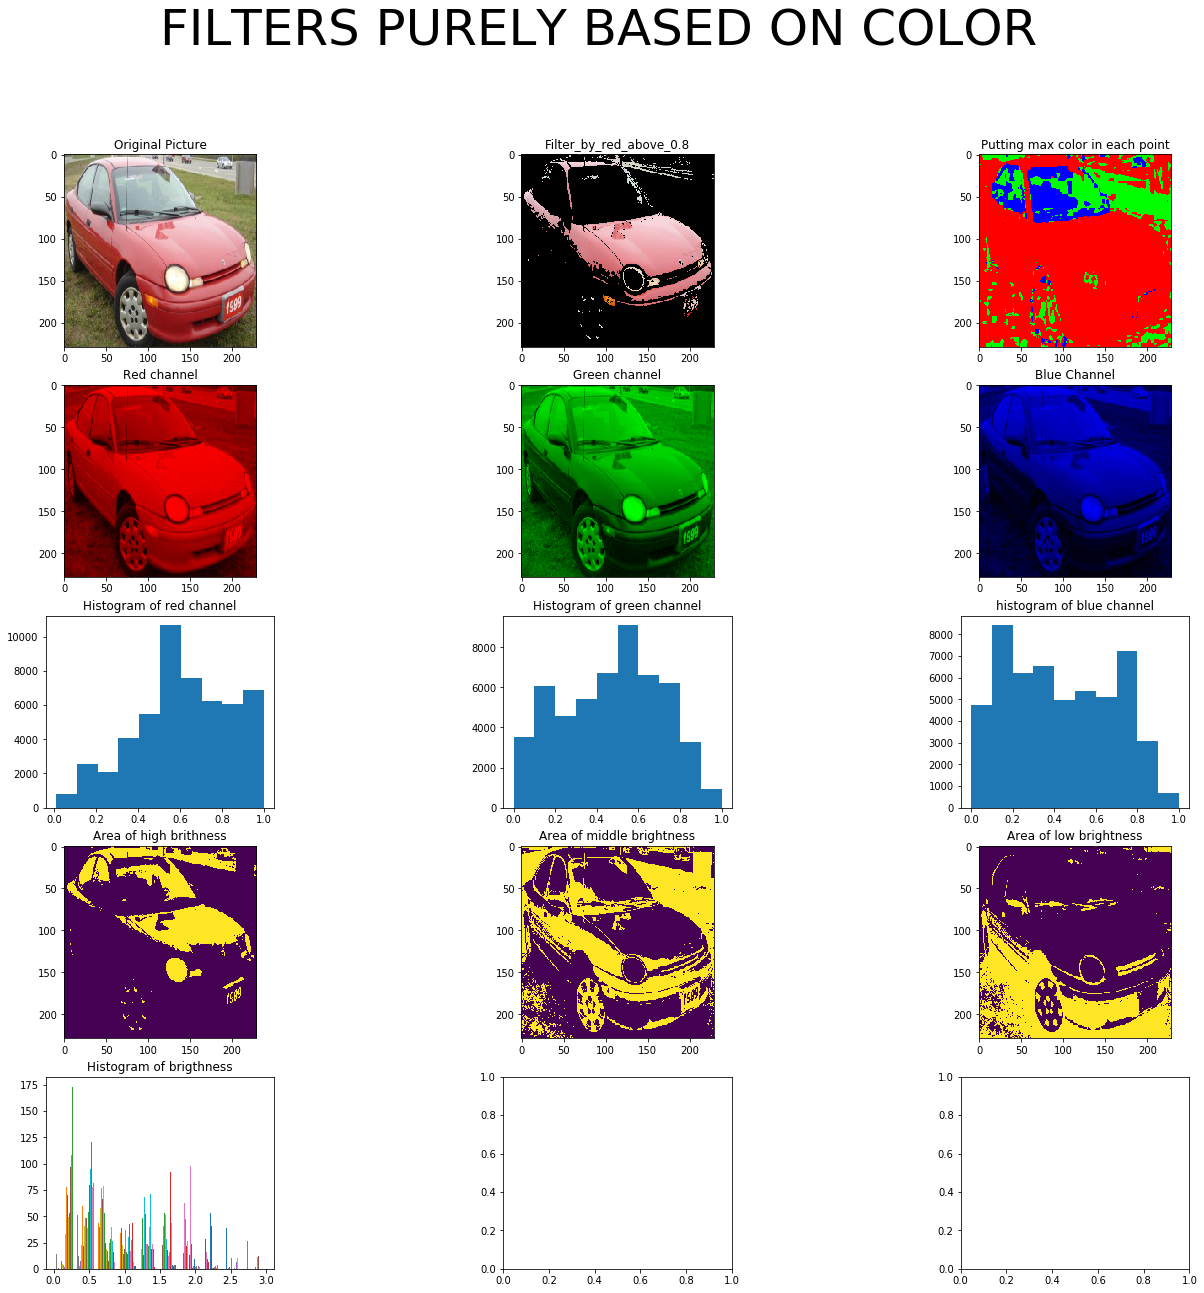

In [0]:
# we open the image
IM=open_image("00016.jpg").data.transpose(0,2).transpose(0,1)

# we defiee how we want to restrict the colors in the filter
 
red_max=1
red_min=0.8

yellow_max=0.9
yellow_min=0

blue_max=0.9
blue_min=0

# we will apply the following filter which is filter I
def my_filterI(x):
 n=x.shape[0]
 m=x.shape[1]
 y=np.copy(x)

 for i in range(n):
  for j in range(m):
      if not((y[i,j,0]<red_max and y[i,j,0]>red_min) and (y[i,j,1]<yellow_max and y[i,j,1]>yellow_min) and (y[i,j,2]<blue_max and y[i,j,2]>blue_min)):
       y[i,j,:]=[0,0,0]
 return(y)  

# we will apply the following filter which is filter III
#and uses brightness
IM_brightness=np.power(IM[:,:,0],2)+np.power(IM[:,:,1],2)+np.power(IM[:,:,2],2)
IM_original=np.copy(IM)

######################################
#first red:
IM_red=np.copy(IM)
IM_red[:,:,1]=0
IM_red[:,:,2]=0


#then yellow:
IM_yellow=np.copy(IM)
IM_yellow[:,:,0]=0
IM_yellow[:,:,2]=0


#then blue
IM_blue=np.copy(IM)
IM_blue[:,:,0]=0
IM_blue[:,:,1]=0



##########################################################################################

def my_filterII(x):
 n=x.shape[0]
 m=x.shape[1]
 y=np.copy(x)

 for i in range(n):
  for j in range(m):
      k=np.argmax(np.array(y[i,j,:]))
      y[i,j,:]=[0,0,0]
      y[i,j,k]=1
 return(y) 

#######################################################################################################
def my_filterIII(x):
 n=x.shape[0]
 m=x.shape[1]
 y=np.copy(x)
 y_brightness=np.power(y[:,:,0],2)+np.power(y[:,:,1],2)+np.power(y[:,:,2],2)
 y_brightness_flat=y_brightness.flatten()
 q_01=np.quantile(y_brightness_flat,0.1)
 q_02=np.quantile(y_brightness_flat,0.2)
 q_03=np.quantile(y_brightness_flat,0.3)
 q_04=np.quantile(y_brightness_flat,0.4)
 q_05=np.quantile(y_brightness_flat,0.5)
 q_06=np.quantile(y_brightness_flat,0.6) 
 q_07=np.quantile(y_brightness_flat,0.7)
 q_08=np.quantile(y_brightness_flat,0.8)
 q_09=np.quantile(y_brightness_flat,0.9)
  
 for i in range(n):
  for j in range(m):
      if y_brightness[i,j]>q_08:
         y_brightness[i,j]=1
      elif (y_brightness[i,j]>q_03 ):
         y_brightness[i,j]=0
      else:
         y_brightness[i,j]=0
 
 return(y_brightness)

#######################################################################################################
def my_filterIV(x):
 n=x.shape[0]
 m=x.shape[1]
 y=np.copy(x)
 y_brightness=np.power(y[:,:,0],2)+np.power(y[:,:,1],2)+np.power(y[:,:,2],2)
 y_brightness_flat=y_brightness.flatten()
 q_01=np.quantile(y_brightness_flat,0.1)
 q_02=np.quantile(y_brightness_flat,0.2)
 q_03=np.quantile(y_brightness_flat,0.3)
 q_04=np.quantile(y_brightness_flat,0.4)
 q_05=np.quantile(y_brightness_flat,0.5)
 q_06=np.quantile(y_brightness_flat,0.6) 
 q_07=np.quantile(y_brightness_flat,0.7)
 q_08=np.quantile(y_brightness_flat,0.8)
 q_09=np.quantile(y_brightness_flat,0.9)
  
 for i in range(n):
  for j in range(m):
      if y_brightness[i,j]>q_07:
         y_brightness[i,j]=0
      elif (y_brightness[i,j]>q_03 ):
         y_brightness[i,j]=1
      else:
         y_brightness[i,j]=0
 
 return(y_brightness) 
#####################################################################################################################################################
def my_filterV(x):
 n=x.shape[0]
 m=x.shape[1]
 y=np.copy(x)
 y_brightness=np.power(y[:,:,0],2)+np.power(y[:,:,1],2)+np.power(y[:,:,2],2)
 y_brightness_flat=y_brightness.flatten()
 q_01=np.quantile(y_brightness_flat,0.1)
 q_02=np.quantile(y_brightness_flat,0.2)
 q_03=np.quantile(y_brightness_flat,0.3)
 q_04=np.quantile(y_brightness_flat,0.4)
 q_05=np.quantile(y_brightness_flat,0.5)
 q_06=np.quantile(y_brightness_flat,0.6) 
 q_07=np.quantile(y_brightness_flat,0.7)
 q_08=np.quantile(y_brightness_flat,0.8)
 q_09=np.quantile(y_brightness_flat,0.9)
  
 for i in range(n):
  for j in range(m):
      if y_brightness[i,j]>q_07:
         y_brightness[i,j]=0
      elif (y_brightness[i,j]>q_03 ):
         y_brightness[i,j]=0
      else:
         y_brightness[i,j]=1
 
 return(y_brightness) 
#################################################################################################3

# creating the display of the images
fig, axs = plt.subplots(nrows=5, ncols=3)
fig.set_size_inches(20.5, 20.5)
axs = axs.flatten()
fig.suptitle('FILTERS PURELY BASED ON COLOR',fontsize=50)
fig.subplots_adjust(wspace=1)




#first row we just show our image IM:
axs[0].imshow(IM_original)
axs[0].set_title("Original Picture")
axs[1].imshow(my_filterI(IM_original))
axs[1].set_title("Filter_by_red_above_0.8")
axs[2].imshow(my_filterII(IM))
axs[2].set_title("Putting max color in each point")

#second row we show the color components of the image IM

#axs[3].imshow(my_filterIV(IM))
axs[3].imshow(IM_red)
axs[3].set_title("Red channel")

axs[4].imshow(IM_yellow)
axs[4].set_title("Green channel")

axs[5].imshow(IM_blue)
axs[5].set_title("Blue Channel")


###############




#next row are histogams of the colors:
#red histogram
IM_red_oneframe=IM_red[:,:,0]
IM_red_flat=IM_red_oneframe.flatten()
axs[6].hist(IM_red_flat)
axs[6].set_title("Histogram of red channel")
#yellow histogram
IM_yellow_oneframe=IM_yellow[:,:,1]
IM_yellow_flat=IM_yellow_oneframe.flatten()
axs[7].hist(IM_yellow_flat)
axs[7].set_title("Histogram of green channel")

#blue histogram
IM_blue_oneframe=IM_blue[:,:,2]
IM_blue_flat=IM_blue_oneframe.flatten()
axs[8].hist(IM_blue_flat)
axs[8].set_title("histogram of blue channel")

#Next we apply some filter to each color keeping only the most frequent
#filter red
IM_red_f=np.copy(IM_red)
IM_red_f=IM_red_f[:,:,0]
IM_red_f[IM_red_f>red_max]=0
IM_red_f[IM_red_f<red_min]=0
#filter yellow
IM_yellow_f=np.copy(IM_yellow)
IM_yellow_f=IM_yellow_f[:,:,1]
IM_yellow_f[IM_yellow_f>yellow_max]=0
IM_yellow_f[IM_yellow_f<yellow_min]=0

#filter blue
IM_blue_f=np.copy(IM_blue)
IM_blue_f=IM_blue_f[:,:,2]
IM_blue_f[IM_blue_f>blue_max]=0
IM_blue_f[IM_blue_f<blue_min]=0

axs[9].imshow(my_filterIII(IM))
axs[9].set_title("Area of high brithness")
axs[10].imshow(my_filterIV(IM))
axs[10].set_title("Area of middle brightness")
axs[11].imshow(my_filterV(IM))
axs[11].set_title("Area of low brightness")
axs[12].hist(IM_brightness)
axs[12].set_title("Histogram of brigthness")
plt.show()